<a href="https://colab.research.google.com/github/APonceM/APonceM/blob/main/Anlisis_de_trading_profesional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis profesional de datos de trading

## Obtener los datos

Como haremos un anañisis con datos intradia obtendremos los datos de los mercados llamando a un API de la página web alpHavantage con los siguientes parametros

**Function:** Rango de tiempo de los datos que quieres obtener por ejmplo: Daily, Intraday, Intraday Extended, etc. La forma de llamarlo es de la siguiente forma:
function=TIME_SERIES_INTRADAY_EXTENDED

**Symbol:** Nombre corto del activo que buscas por ejemplo: SP500, MSFT,IBM, etc. Se utiliza de la siguiente forma: symbol=IBM

**Interval:** El intervalo de tiempo que buscas del precio del activo, los valores soportados en intraday son 1min, 5min, 15min, 30min, 60min. Se utiliza de la siguiente forma: interval=15min 

**Slice:** Todos los datos históricos que requieras

Para mas info de la API veáse la documentación: https://www.alphavantage.co/documentation/


In [ ]:
import requests
import pandas as pd

API_KEY = 'BGJ8W6CXV0JK0SSD'
r = requests.get('https://www.alphavantage.co/query?function=TIME_SERIES_DAILY&symbol=IBM&apikey=BGJ8W6CXV0JK0SSD') #Request de la API
data=r.json()  #Convertimos los datos a json
tradding=pd.DataFrame(data['Time Series (Daily)']) #De la base de datos accedemos a los datos que necesitamos
data=tradding.transpose() #Transponemos lo datos porque estan al revés xd
data.head()

,1. open,2. high,3. low,4. close,5. volume
2022-09-09,128.9000,129.4900,128.0600,129.1900,3293365
2022-09-08,127.2000,128.5400,126.5900,128.4700,2964613
2022-09-07,126.6900,127.8667,126.2800,127.7100,2401513
2022-09-06,127.8000,128.0600,126.3000,126.7200,3345343
2022-09-02,130.3000,130.5600,127.2400,127.7900,3040813


In [ ]:
data.shape

(100, 5)

In [ ]:
import csv
import requests

# replace the "demo" apikey below with your own key from https://www.alphavantage.co/support/#api-key
CSV_URL = 'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY_EXTENDED&symbol=NVDA&interval=60min&slice=year1month1&adjusted=false&apikey=BGJ8W6CXV0JK0SSD'

with requests.Session() as s:
    download = s.get(CSV_URL)
    decoded_content = download.content.decode('utf-8')
    cr = csv.reader(decoded_content.splitlines(), delimiter=',')
    my_list = list(cr)
    #for row in my_list:
     #   print(row)
        
data=pd.DataFrame(my_list)
data.head(50)

,0,1,2,3,4,5
0,time,open,high,low,close,volume
1,2022-09-09 20:00:00,143.7,143.82,143.63,143.71,24502
2,2022-09-09 19:00:00,143.83,143.83,143.6,143.65,26063
3,2022-09-09 18:00:00,143.79,143.85,143.78,143.8,16897
4,2022-09-09 17:00:00,143.87,143.94,143.6,143.8,521473
5,2022-09-09 16:00:00,143.51,144.411,143.38,143.88,6820296
6,2022-09-09 15:00:00,144.11,144.15,143.16,143.52,5009102
7,2022-09-09 14:00:00,144.18,144.74,143.84,144.13,4530699
8,2022-09-09 13:00:00,144.06,144.325,143.11,144.17,5790423
9,2022-09-09 12:00:00,143.4701,144.45,142.75,144.06,6085000


Como podemos notar la columna de los nombres esta en la base de datos como un registro más, entonces arreglemos esto eliminando ese registro y nombrando las columnas a nuestro modo

In [ ]:
data=data.drop([0],axis=0) #Borramos el primer registro
data.columns=['time','open','high','low','close','volume']

data.head()

,time,open,high,low,close,volume
1,2022-09-09 20:00:00,143.7,143.82,143.63,143.71,24502
2,2022-09-09 19:00:00,143.83,143.83,143.6,143.65,26063
3,2022-09-09 18:00:00,143.79,143.85,143.78,143.8,16897
4,2022-09-09 17:00:00,143.87,143.94,143.6,143.8,521473
5,2022-09-09 16:00:00,143.51,144.411,143.38,143.88,6820296


Ahora, para hacer nuestro anaálisis debemos convertir nuestros datos a float (excepto el tiempo).

El tiempo lo convertimos a variable datetime y además para que las horas coincidan con el horario de CDMX le restamos 2 horas

In [ ]:
data=data.astype({'open':'float64','high':'float64','low':'float64','close':'float64','volume':'float64'})
data["time"]=pd.to_datetime(data["time"])
data["time"]=data["time"]-pd.Timedelta(hours=2)
data.dtypes

time      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume           float64
dtype: object

Veamos entonces como quedaron los datos con las horas corregidas

In [ ]:
data.head(25)

,time,open,high,low,close,volume
1,2022-09-09 18:00:00,143.7000,143.820,143.6300,143.7100,24502.0
2,2022-09-09 17:00:00,143.8300,143.830,143.6000,143.6500,26063.0
3,2022-09-09 16:00:00,143.7900,143.850,143.7800,143.8000,16897.0
4,2022-09-09 15:00:00,143.8700,143.940,143.6000,143.8000,521473.0
5,2022-09-09 14:00:00,143.5100,144.411,143.3800,143.8800,6820296.0
6,2022-09-09 13:00:00,144.1100,144.150,143.1600,143.5200,5009102.0
7,2022-09-09 12:00:00,144.1800,144.740,143.8400,144.1300,4530699.0
8,2022-09-09 11:00:00,144.0600,144.325,143.1100,144.1700,5790423.0
9,2022-09-09 10:00:00,143.4701,144.450,142.7500,144.0600,6085000.0
10,2022-09-09 09:00:00,143.2800,143.950,142.2100,143.4797,9220278.0


Como podemos notar ya nuestroas datos son variables float

## ANÁLISIS TÉCNICO

### Tendencias

Una tendencia la podriamos definir a base de impulsos, un impulso es un moviento que realiza el precio aumentandolo o reduciendolo, un tendencia sería la concatenación de varios impulsos junto con sus retroceso.

Ahora, antes de querer detectar en los datos una tendencia, debemos detectar los impulsos, una forma de hacerlo es detectar una secuencia de moviemientos seguidos en el que los cierres vayan en aumento o decremento.

Primero veamos el caso de un impulso alcista

In [ ]:
closes=data["close"] #utilicemos solo la columna closes
tope=300 #Variable tope para los moviemientos analizados 
impulsos_al=[] #Creamos una lista vacía donde almacenaremos la info de los impulsos alcistas encontrados 
cont=0 #Contador de barras del impulso
band=False
for i in range(1,tope+1): #Nota que el for va del dato mas reciente al mas antiguo
    if closes[i]>=closes[i+1]: #calculamos las barras que han cerrado mas alto que su anterior 
        cont+=1 #aumentamos el contador
        band=False
    else:
        band=True
    if cont!=0 and band: #En caso de ya no seguir con el impulso
        #almacenamo en una lista la info del impulso: [Fecha inicio, fecha fin, no.de barras, incremento en precio]
        impulsos_al.append([data["time"][i],data["time"][i-cont],cont+1,closes[i-cont]-closes[i]]) 
        cont=0 #Reinicias el contador 
        
impulsos_alcistas=pd.DataFrame(impulsos_al)
impulsos_alcistas.columns=["Inicio","Final", "No. de barras","Incremento"] #Creamos un DF con la info
impulsos_alcistas.head(20)

,Inicio,Final,No. de barras,Incremento
0,2022-09-09 17:00:00,2022-09-09 18:00:00,2,0.0600
1,2022-09-09 15:00:00,2022-09-09 16:00:00,2,0.0000
2,2022-09-09 13:00:00,2022-09-09 14:00:00,2,0.3600
3,2022-09-09 06:00:00,2022-09-09 11:00:00,6,2.1400
4,2022-09-09 04:00:00,2022-09-09 05:00:00,2,0.2900
5,2022-09-08 16:00:00,2022-09-09 03:00:00,4,1.7500
6,2022-09-08 11:00:00,2022-09-08 15:00:00,5,2.4300
7,2022-09-08 07:00:00,2022-09-08 10:00:00,4,2.3281
8,2022-09-08 04:00:00,2022-09-08 05:00:00,2,0.5300
9,2022-09-07 14:00:00,2022-09-07 17:00:00,4,0.6300


Ahora veamos el caso con impulsos bajistas

In [ ]:
closes=data["close"] #utilicemos solo la columna closes
tope=300 #Variable tope para los moviemientos analizados 
impulsos_baj=[] #Creamos una lista vacía donde almacenaremos la info de los impulsos alcistas encontrados 
cont=0 #Contador de barras del impulso
band=False
for i in range(1,tope+1): #Nota que el for va del dato mas reciente al mas antiguo
    if closes[i]<closes[i+1]: #calculamos las barras que han cerrado mas alto que su anterior 
        cont+=1 #aumentamos el contador
        band=False
    else:
        band=True
    if cont!=0 and band: #En caso de ya no seguir con el impulso
        #almacenamo en una lista la info del impulso: [Fecha inicio, fecha fin, no.de barras, incremento en precio]
        impulsos_baj.append([data["time"][i],data["time"][i-cont],cont+1,closes[i-cont]-closes[i]]) 
        cont=0 #Reinicias el contador 
    
impulsos_bajistas=pd.DataFrame(impulsos_baj)
impulsos_bajistas.columns=["Inicio","Final", "No. de barras","Incremento"] #Creamos un DF con la info
impulsos_bajistas.head(20)

,Inicio,Final,No. de barras,Incremento
0,2022-09-09 16:00:00,2022-09-09 17:00:00,2,-0.1500
1,2022-09-09 14:00:00,2022-09-09 15:00:00,2,-0.0800
2,2022-09-09 11:00:00,2022-09-09 13:00:00,3,-0.6500
3,2022-09-09 05:00:00,2022-09-09 06:00:00,2,-0.0400
4,2022-09-09 03:00:00,2022-09-09 04:00:00,2,-0.1200
5,2022-09-08 15:00:00,2022-09-08 16:00:00,2,-0.0400
6,2022-09-08 10:00:00,2022-09-08 11:00:00,2,-1.0300
7,2022-09-08 05:00:00,2022-09-08 07:00:00,3,-1.2681
8,2022-09-07 17:00:00,2022-09-08 04:00:00,4,-0.5800
9,2022-09-07 13:00:00,2022-09-07 14:00:00,2,-0.4700


Confirmemos los movimientos con la gráfico

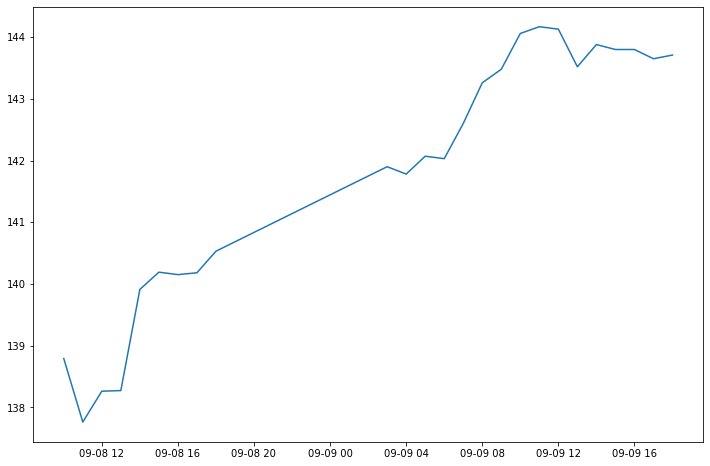

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,8))#Creamos una figura que contendrá nuestra gráfica
ax.plot(data["time"][:25],data["close"][:25]) #Imprimimos los primeros 20 registros de los datos


Notamos que todos los datos de fecha encontrados son los moviemientos en donde el impulso cambia de dirección

ya con el algoritmo para la localización de los impusos entonces podemos ahora crear el algoritmo para la localización de las tendencias, en terminos más precisos una tendencia es una secuencia de máximos y minimos crecientes o decrecientes 

Calculemos para tendencias alcistas

In [ ]:
tope=30
tend_al=[]
cont=0
band=False

for i in range(tope):
    '''Como en el dataframe de los impulsos alcistas cada dato en las columnas "final" e "inicio" se encuentran todos los picos 
    del gráfico, entonces detectaremos una tendencia cuando un el inicio de un impulso sea mayor qe el inicio del siguiente y
    los mismo para los finales'''
    #Ubicamos el precio final inicial y final de los impulsos
    
    precio_inicio_1=data[data["time"]==impulsos_alcistas["Inicio"][i]]["close"].values[0]
    precio_final_1=data[data["time"]==impulsos_alcistas["Final"][i]]["close"].values[0]
    
    precio_inicio_2=data[data["time"]==impulsos_alcistas["Inicio"][i+1]]["close"].values[0]
    precio_final_2=data[data["time"]==impulsos_alcistas["Final"][i+1]]["close"].values[0]
    
    if precio_inicio_1>precio_inicio_2 and precio_final_1>precio_final_2: #Condición de máx y mín allcistas
        cont+=1 #aumentamos el contador
        band=False
    else:
        band=True
    if cont!=0 and band: #En caso de ya no seguir con el impulso
        #almacenamo en una lista la info del impulso: [Fecha inicio, fecha fin, no.de impulsos, incremento en precio]
        precio_final_tend=data[data["time"]==impulsos_alcistas["Inicio"][i-cont]]["close"].values[0]
        precio_incio_tend=data[data["time"]==impulsos_alcistas["Inicio"][i]]["close"].values[0]
        
        tend_al.append([impulsos_alcistas["Inicio"][i],impulsos_alcistas["Final"][i-cont],cont+1,precio_final_tend-precio_incio_tend]) 
        cont=0 #Reinicias el contador 
    
tendencias_alcistas=pd.DataFrame(tend_al)
tendencias_alcistas.columns=["Inicio","Final", "No. impulsos","Incremento"] #Creamos un DF con la info
tendencias_alcistas.head(20)
    


,Inicio,Final,No. impulsos,Incremento
0,2022-09-08 07:00:00,2022-09-09 11:00:00,5,5.5681
1,2022-09-07 09:00:00,2022-09-07 17:00:00,3,2.7800
2,2022-09-02 14:00:00,2022-09-06 03:00:00,2,0.0400
3,2022-08-31 18:00:00,2022-09-01 07:00:00,2,1.7100


Ahora para las tendencias bajistas 

In [ ]:
tope=30
tend_baj=[]
cont=0
band=False

for i in range(tope):
    '''Como en el dataframe de los impulsos alcistas cada dato en las columnas "final" e "inicio" se encuentran todos los picos 
    del gráfico, entonces detectaremos una tendencia cuando un el inicio de un impulso sea mayor qe el inicio del siguiente y
    los mismo para los finales'''
    #Ubicamos el precio final inicial y final de los impulsos
    
    precio_inicio_1=data[data["time"]==impulsos_bajistas["Inicio"][i]]["close"].values[0]
    precio_final_1=data[data["time"]==impulsos_bajistas["Final"][i]]["close"].values[0]
    
    precio_inicio_2=data[data["time"]==impulsos_bajistas["Inicio"][i+1]]["close"].values[0]
    precio_final_2=data[data["time"]==impulsos_bajistas["Final"][i+1]]["close"].values[0]
    
    if precio_inicio_1<precio_inicio_2 and precio_final_1<precio_final_2: #Condición de máx y mín bajistas
        cont+=1 #aumentamos el contador
        band=False
    else:
        band=True
    if cont!=0 and band: #En caso de ya no seguir con la tendencia
        #almacenamo en una lista la info del impulso: [Fecha inicio, fecha fin, no.de impulsos, incremento en precio]
        precio_final_tend=data[data["time"]==impulsos_bajistas["Inicio"][i-cont]]["close"].values[0]
        precio_incio_tend=data[data["time"]==impulsos_bajistas["Inicio"][i]]["close"].values[0]
        
        tend_baj.append([impulsos_bajistas["Inicio"][i],impulsos_bajistas["Final"][i-cont],cont+1,precio_final_tend-precio_incio_tend]) 
        cont=0 #Reinicias el contador 
    
tendencias_bajistas=pd.DataFrame(tend_baj)
tendencias_bajistas.columns=["Inicio","Final", "No. impulsos","Incremento"] #Creamos un DF con la info
tendencias_bajistas.head(20)

,Inicio,Final,No. impulsos,Incremento
0,2022-09-09 14:00:00,2022-09-09 17:00:00,2,-0.08
1,2022-09-07 17:00:00,2022-09-08 07:00:00,2,-0.05
2,2022-09-07 03:00:00,2022-09-07 09:00:00,2,-0.04
3,2022-09-06 03:00:00,2022-09-06 17:00:00,6,-3.35
4,2022-09-02 07:00:00,2022-09-02 14:00:00,3,-3.53
5,2022-09-01 16:00:00,2022-09-02 05:00:00,2,-0.25
6,2022-08-31 10:00:00,2022-08-31 18:00:00,2,-0.62


In [ ]:
data["time"]-pd.Timedelta(hours=2)

1     2022-09-09 16:00:00
2     2022-09-09 15:00:00
3     2022-09-09 14:00:00
4     2022-09-09 13:00:00
5     2022-09-09 12:00:00
              ...        
316   2022-08-12 05:00:00
317   2022-08-12 04:00:00
318   2022-08-12 03:00:00
319   2022-08-12 02:00:00
320   2022-08-12 01:00:00
Name: time, Length: 320, dtype: datetime64[ns]

In [ ]:
8*20

160